In [3]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
import pandas as pd
import scipy


## Q1



<span style='font-family:Monaco'><span style='font-size:medium'>With a </span></span><span style='font-family:Monaco'><span style='font-size:medium'>_\[2,2\]_</span></span><span style='font-family:Monaco'><span style='font-size:medium'> by </span></span><span style='font-family:Monaco'><span style='font-size:medium'>_\[2,N\]_</span></span><span style='font-family:Monaco'><span style='font-size:medium'>  matrix multiplication you'll expect to have a </span></span><span style='font-family:Monaco'><span style='font-size:medium'>_\[2,N\]_</span></span><span style='font-family:Monaco'><span style='font-size:medium'> matrix as a result. </span></span>$$M=
\begin{pmatrix}
m_{11} & m_{12} \\
m_{21} & m_{22}
\end{pmatrix}$$

$$rays=\begin{pmatrix}
y_1 & y_2 & y_3 \\
\theta_1 & \theta_2 & \theta_3
\end{pmatrix}$$

<span style='font-size:medium'><span style='font-family:Monaco'>Our matrix multiplication can be shown to be </span></span>

$$
M \times \text{rays} = 
\begin{bmatrix}
m_{11} & m_{12} \\
m_{21} & m_{22}
\end{bmatrix}
\times
\begin{bmatrix}
y_1 & y_2 & y_3 \\
\theta_1 & \theta_2 & \theta_3
\end{bmatrix}
$$

<span style='font-size:medium'><span style='font-family:Monaco'>This results in a matrix of:</span></span>

\begin{pmatrix}
m_{11} \times y_1 + m_{12} \times \theta_1 & m_{11} \times y_2 + m_{12} \times \theta_2 & m_{11} \times y_3 + m_{12} \times \theta_3 \\
m_{21} \times y_1 + m_{22} \times \theta_1 & m_{21} \times y_2 + m_{22} \times \theta_2 & m_{21} \times y_3 + m_{22} \times \theta_3
\end{pmatrix}

$$
Refracted\:rays=\begin{pmatrix}
new\:y_1 & new\:y_2 & new\:y_3 \\
new\:\theta_1 & new\:\theta_2 & new\:\theta_3
\end{pmatrix}
$$

---

<span style='font-size:medium'><span style='font-family:Monaco'>This should now give us the correct transformation coming out of the optical system as Matrix M is accordingly set up to mimic the optical properties of the optics, if there was no transformation the position of the rays would be of the same angle as the primary ray but at a different position in terms of y as it will keep moving in the direction it was going. Unless of course, the angle theta from the optical plane is 0. </span></span>



## Q2



The information gained for thin and Spherical lenses where gained from this Wikipedia page 


In [4]:
class opticalElement():
    def __init__(self,matrix):
        self.matrix = matrix
    def propagate(self,rays):
        '''
        performing the matrix multipilcation
        '''
        return self.matrix @ rays
    
class freeSpace(opticalElement):
    def __init__(self,distance):
        '''
        The travel of rays through free space "air or a vacuum"
        FSM: Free Space Matrix
        '''
        FSM = np.array([[1,distance],[0,1]])
        super().__init__(FSM)
         
class thinLens(opticalElement):
    def __init__(self,focalLength):
        '''
        the travel of rays through a thins
        TLM: Thin Lens Matrix
        fL: focal length of optics, Has to be >0:
        '''
        TLM=np.array([[1, 0],[-1/focalLength, 1]])
        super().__init__(TLM)
class planar(opticalElement):
    def __init__(self,n1,n2):
        '''
        PM: Planar mantrix
        n1: incident index
        n2: refracted index
        '''
        PM=np.array([[1,0],[0,(n1/n2)]])
        super().__init__(PM)
class spherical(opticalElement):
     def __init__(self,radius,n1,n2):
        '''
        SPHM: Spherical matrix
        radius: radius of curvature / the sphere that would plot geometry of lens
        n1: incident index
        n2: refracted index
        '''
        SPHM=np.array([[1,0],[((n1-n2)/(radius*n2)),(n1/n2)]])
        super().__init__(SPHM)


In [5]:
# Define a function to compare arrays element-wise within a tolerance
def assert_almost_equal(arr1, arr2, tol=1e-3):
    assert arr1.shape == arr2.shape, "Arrays have different shapes"
    for i in range(arr1.shape[0]):
        for j in range(arr1.shape[1]):
            assert abs(arr1[i, j] - arr2[i, j]) < tol, f"Element mismatch at ({i}, {j})"

# Define an array of initial rays (2xN array of (y, theta) values for N rays)

rays = np.array([[1, 0.1, 3], [2, -0.2, 9]])

#for the parameters radius,n1,n2,distance and focal lengh:
distance, focalLength, n1, n2, radius = 10, 5, 1.0, 1.5, 10

#the expected matrix for each class ar, worked out externally e:
expected_freespace_rays = np.array([[21, -1.9, 93.], [2, -0.2, 9]])
expected_thinlens_rays = np.array([[1, 0.1, 3], [1.8, -0.22, 8.4]])
expected_planar_rays = np.array([[1, 0.1, 3], [1.33333333, -0.13333333, 6]])
expected_spherical_rays = np.array([[1, 0.1, 3], [1.3, -0.13666667, 5.9]])

# Create instances of each optical element
freeSpace_element = freeSpace(distance)
thinlens_element = thinLens(focalLength)
planar_refraction_element = planar(n1, n2)
spherical_refraction_element = spherical(radius, n1, n2)

# Propagate rays through each element
output_rays_freeSpace = freeSpace_element.propagate(rays)
output_rays_thinlens = thinlens_element.propagate(rays)
output_rays_planar_refraction = planar_refraction_element.propagate(rays)
output_rays_spherical_refraction = spherical_refraction_element.propagate(rays)

# Assert the output rays for each element
print("Output rays after transmission in free space:")
print(output_rays_freeSpace)
assert_almost_equal(output_rays_freeSpace, expected_freespace_rays)

print("\nOutput rays after passing through the thin lens:")
print(output_rays_thinlens)
assert_almost_equal(output_rays_thinlens, expected_thinlens_rays)

print("\nOutput rays after refraction at a planar surface:")
print(output_rays_planar_refraction)
assert_almost_equal(output_rays_planar_refraction, expected_planar_rays)

print("\nOutput rays after refraction at a spherical surface:")
print(output_rays_spherical_refraction)
assert_almost_equal(output_rays_spherical_refraction, expected_spherical_rays)


Output rays after transmission in free space:
[[21.  -1.9 93. ]
 [ 2.  -0.2  9. ]]

Output rays after passing through the thin lens:
[[ 1.    0.1   3.  ]
 [ 1.8  -0.22  8.4 ]]

Output rays after refraction at a planar surface:
[[ 1.          0.1         3.        ]
 [ 1.33333333 -0.13333333  6.        ]]

Output rays after refraction at a spherical surface:
[[ 1.          0.1         3.        ]
 [ 1.3        -0.13666667  5.9       ]]


## Q3



In [6]:
class opticalElement():
    def __init__(self, matrix):
        self.matrix = matrix
    
    def propagate(self, rays):
        '''
        performing the matrix multiplication
        '''
        return self.matrix @ rays
    
    def __add__(self, other):
        if isinstance(other, opticalElement):
            # Combine matrices of two optical elements by matrix multiplication
            combined_matrix = self.matrix @ other.matrix
            return opticalElement(combined_matrix)
        else:
            raise TypeError("Unsupported operand type(s) for +: '{}' and '{}'".format(type(self), type(other)))
    
class freeSpace(opticalElement):
    def __init__(self, distance):
        '''
        The travel of rays through free space "air or a vacuum"
        FSM: Free Space Matrix
        distance: the distance the ray has to trvale in free air
        '''
        FSM = np.array([[1, distance], [0, 1]])
        super().__init__(FSM)

class sphericalMirror(opticalElement):
    def __init__(self, radius, theta):
        '''
        SPHMM: Spherical Mirror matrix
        radius: radius of curvature / the sphere that would plot geometry of the mirror
        theta: the mirror angle of incidence in the horizontal plane.
        '''
        SPHMM = np.array([[1, 0], [-2 / (radius / np.cos(theta)), 1]])
        super().__init__(SPHMM)


distance1=10
distance2= 20
        
# Create instances of each optical element
freeSpace_element1 = freeSpace(distance1)
sphericalMirror_element = sphericalMirror(radius=1, theta=0)
freeSpace_element = freeSpace(distance2)
system = freeSpace_element + sphericalMirror_element +freeSpace_element

initial_rays = np.array([[1, 1],
                          [0, 0]])

# Propagate rays through the optical system
output_rays_system = system.propagate(initial_rays)

print("Output rays after passing through the optical system:")
print(output_rays_system)

Output rays after passing through the optical system:
[[-39. -39.]
 [ -2.  -2.]]


In [7]:
def assert_almost_equal(arr1, arr2, tol=1e-3):
    assert arr1.shape == arr2.shape, "Arrays have different shapes"
    for i in range(arr1.shape[0]):
        for j in range(arr1.shape[1]):
            assert abs(arr1[i, j] - arr2[i, j]) < tol, f"Element mismatch at ({i}, {j})"

# Define an array of initial rays (2xN array of (y, theta) values for N rays)
initial_rays = np.array([[1, 1],
                          [0, 0]])


#for the parameters radius,n1,n2,distance and focal lengh:

#the expected matrix for our ray matrix[[1,1],[0,0]] externally calculated , if we change a value we should see a error pop up: 
expected_output_rays = np.array([[-39, -39],
                                 [-2, -2]])

output_rays_system = system.propagate(initial_rays)


# Assert the output rays for each element
print("Output rays after transmission in free space:")
print(output_rays_system)


Output rays after transmission in free space:
[[-39. -39.]
 [ -2.  -2.]]


<span style='font-family:Monaco'>We aim to make a biconvex lens with a thickness in the middle and find it's focal length, we can do this by using these equations.</span>

$$
Spherical\:matrix =\begin{pmatrix}
1 & 0 \\
\frac{n_1 - n_2}{\text{r} \times n_2} & \frac{n_1}{n_2} \\
\end{pmatrix}
$$

$$
Single\: prism\:matrix =\begin{pmatrix}
1 & \frac{t}{\text{n}} \\
0 & 1 \\
\end{pmatrix}
$$

<span style='font-family:Monaco'>By combining them with additional spherical components where \( n_1 \) and \( n_2 \) are reversed and the Radius is negative, we should get a complete matrix that equates to a thin lens.</span> 

$$
\begin{pmatrix}
1 & 0 \\
\frac{n_1 - n_2}{\text{r} \times n_2} & \frac{n_1}{n_2} \\
\end{pmatrix}
\times
\begin{pmatrix}
1 & \frac{t}{\text{n}} \\
0 & 1 \\
\end{pmatrix}
\times
\begin{pmatrix}
1 & 0 \\
\frac{n_2 - n_1}{\text{r} \times n_1} & \frac{n_2}{n_1} \\
\end{pmatrix}=
\begin{pmatrix}
1 & 0 \\
\frac{1}{\text{-f}} & 1 \\
\end{pmatrix}
$$

<span style='font-family:Monaco'>So by selecting the negative inverse  \[1,0\] of the system matrix, we can obtain the focal length and then we can test our system by comparing it to the lens maker equation. which for this specific case should return 267mm or 0.267 meters.</span>
$$\frac{1}{f} = (n - 1) \left( \frac{1}{R_1} - \frac{1}{R_2} + \frac{(n-1)\times d}{n \times R_1 \times R_2} \right)$$

<span style='font-family:Monaco'>however, there are two different types of focal length, the effective focal length and the back focal length, both of which are defined as so:</span>$$
\text{Effective focal length} = \frac{1}{{\text{system}[0,1]}}
$$
$$\text{Back focal length} = \frac{{system}[0,0]}{{\text{system}[0,1]}}$$<span style='font-family:Monaco'>: information used can be found </span>here:[https://ocw.mit.edu/courses/2\-71\-optics\-spring\-2014/04d4bff4ff4a9ae5e2c8ba7500905557\_MIT2\_71S14\_lec4\_notes.pdf](https://ocw.mit.edu/courses/2-71-optics-spring-2014/04d4bff4ff4a9ae5e2c8ba7500905557_MIT2_71S14_lec4_notes.pdf) 



In [9]:
class opticalElement:
    def __init__(self, matrix):
        self.matrix = matrix
    
    def propagate(self, rays):
        '''
        Performing the matrix multiplication
        '''
        return self.matrix @ rays
    
    def __add__(self, other):
        if isinstance(other, opticalElement):
            # Combining matrices of two optical elements by matrix multiplication
            combinedMatrix = other.matrix @ self.matrix
            return opticalElement(combinedMatrix)
        else:
            raise TypeError("Unsupported operand type(s) for +: '{}' and '{}'".format(type(self), type(other)))

class Spherical(opticalElement):
    def __init__(self, radius, n1, n2):
        '''
        Spherical matrix
        radius: radius of curvature / the sphere that would plot geometry of lens
        n1: incident index
        n2: refracted index
        '''
        SPHM = np.array([[1, 0], [((n1 - n2) / (radius * n2)), (n1 / n2)]])
        super().__init__(SPHM)

class MiddleGlass(opticalElement):
    def __init__(self, thickness,n):
        '''
        The travel of rays through middle glass (SiO2)
        thickness: thickness of the middle glass
        n: refractive_index: refractive index of SiO2
        '''
        MGM = np.array([[1, thickness/n], [0, 1]])
        super().__init__(MGM)

# Load refractive index data for SiO2
refractive_index_data = pd.read_csv("SiO2.txt", sep="\t")
wavelengths = refractive_index_data["Wavelength(nm)"]
refractive_indices = refractive_index_data["n"]

# Find refractive index for blue light (wavelength of 400 nm)
blue_wavelength = 400  # nm
blue_refractive_index =np.interp(blue_wavelength, wavelengths, refractive_indices)

print("Refractive index for blue light (400 nm):", blue_refractive_index)

# Define lens parameters
lens_thickness = 0.01  # m
lens_radius = 0.250  # m
refractive_index_air = 1.0003  # Refractive index of air

# Creating optical elements for the optical system where we use the spherical class twice two creaye a reverse twin
spherical_surface = Spherical(radius=lens_radius, n1=refractive_index_air, n2=blue_refractive_index)
middle_glass = MiddleGlass(thickness=lens_thickness, n=blue_refractive_index)
reverse_spherical_surface = Spherical(radius=-lens_radius, n1=blue_refractive_index, n2=refractive_index_air)

# Define the optical system by using the __add__ class
system = spherical_surface + middle_glass + reverse_spherical_surface

# Define initial rays
initial_rays = np.array([[0.01, 0.01], [0, 0]])

# Propagate rays through the optical system and finding the focal lenght from the system matrix
output_rays_system = system.propagate(initial_rays)
Effective_focal_length = -1 / system.matrix[1,0]
Back_focal_length = -system.matrix[0,0] / system.matrix[1,0]

print("Output rays after passing through the optical system:")
print(output_rays_system)
print("Focal length of the optical system:", Effective_focal_length, "meters")
print("Focal length of the optical system:", Back_focal_length, "meters")

Refractive index for blue light (400 nm): 1.4701
Output rays after passing through the optical system:
[[ 0.00991305  0.00991305]
 [-0.03740938 -0.03740938]]
Focal length of the optical system: 0.26731265720304104 meters
Focal length of the optical system: 0.26498832193701854 meters


In [40]:
expected_effective_focal_length =0.267
assert np.isclose(Effective_focal_length, expected_effective_focal_length, rtol=1e-02, atol=1e-03),f"Effective focal length ({Effective_focal_length}) is not within tolerance of {expected_effective_focal_length}"


## Q5



From the last question we can find how the screen would look at the point 400nm light would converge, this did require some trial and error as the effective focal lenght which i what i was working the assumption wwould work didn't. Instead it was the back focal length that gave the correct alignment for the 410nm.

From there we can use trigonometric to find the new y positions of the rays:


$$
\text{New y values}=y+\theta\cdot\text{Focal length}
$$

i'm going with the small angle approximation since from testing it seems to work 
$$
\tan(\theta) \approx\theta
$$



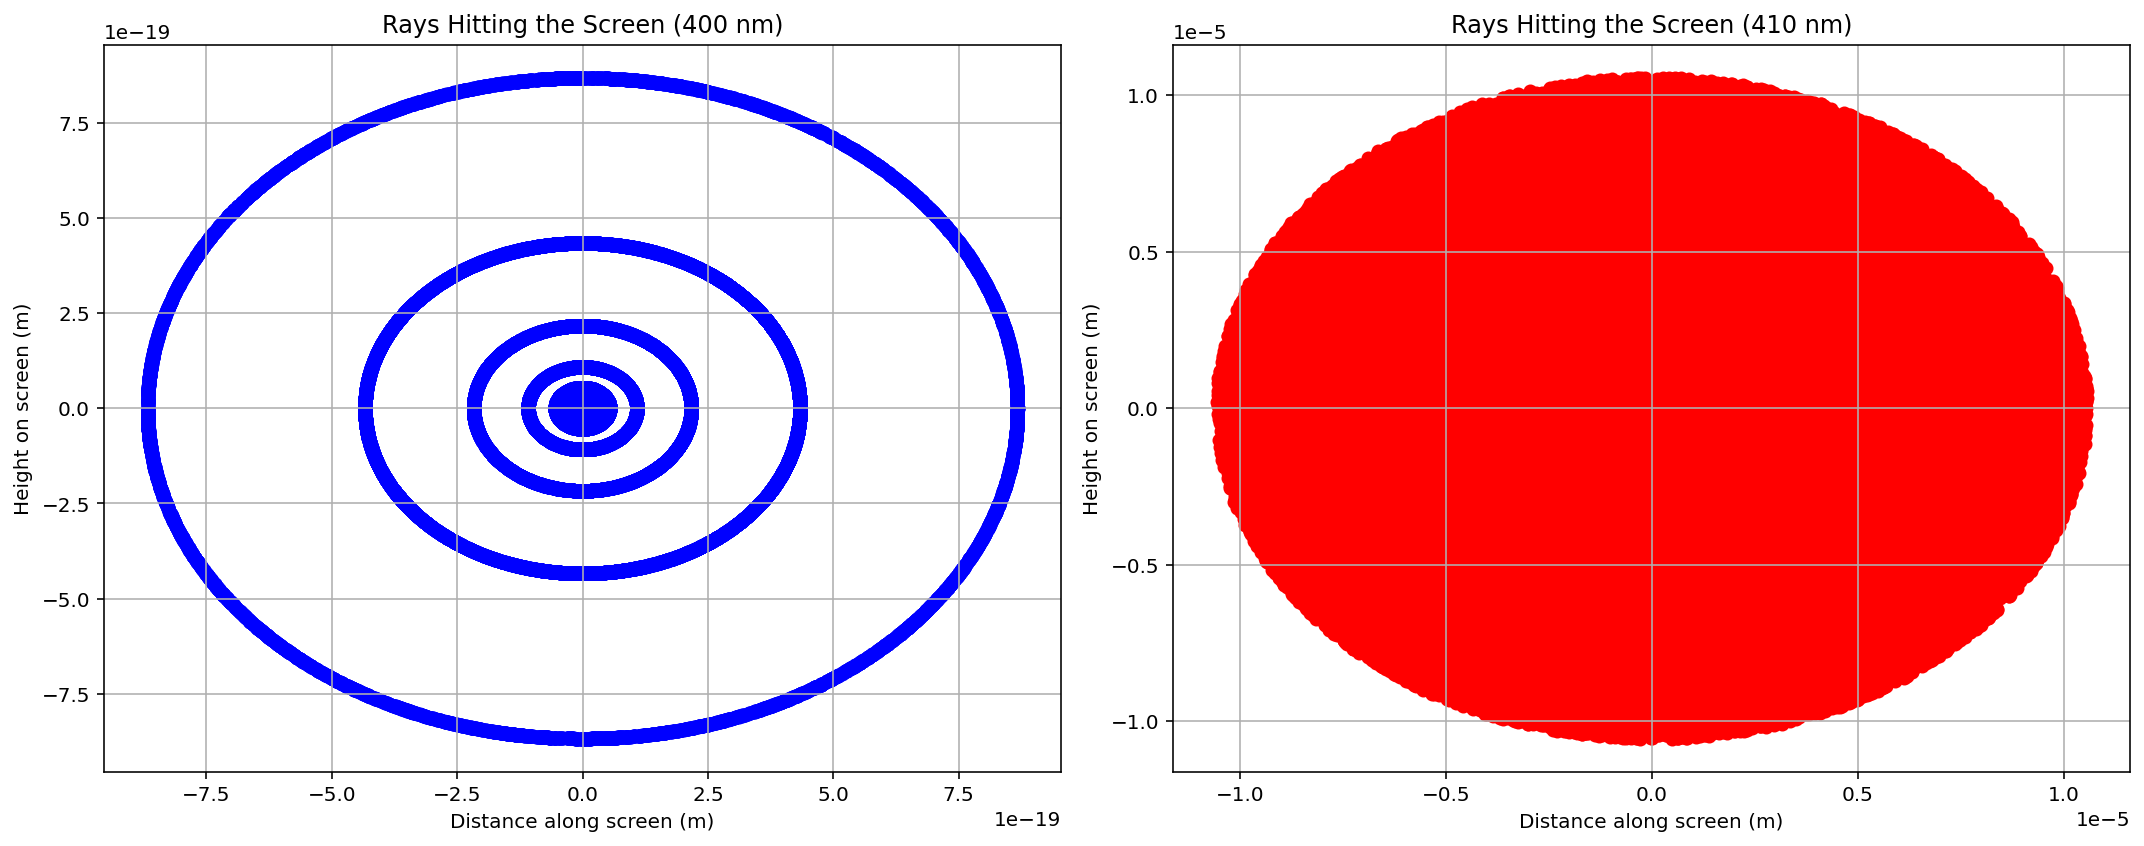

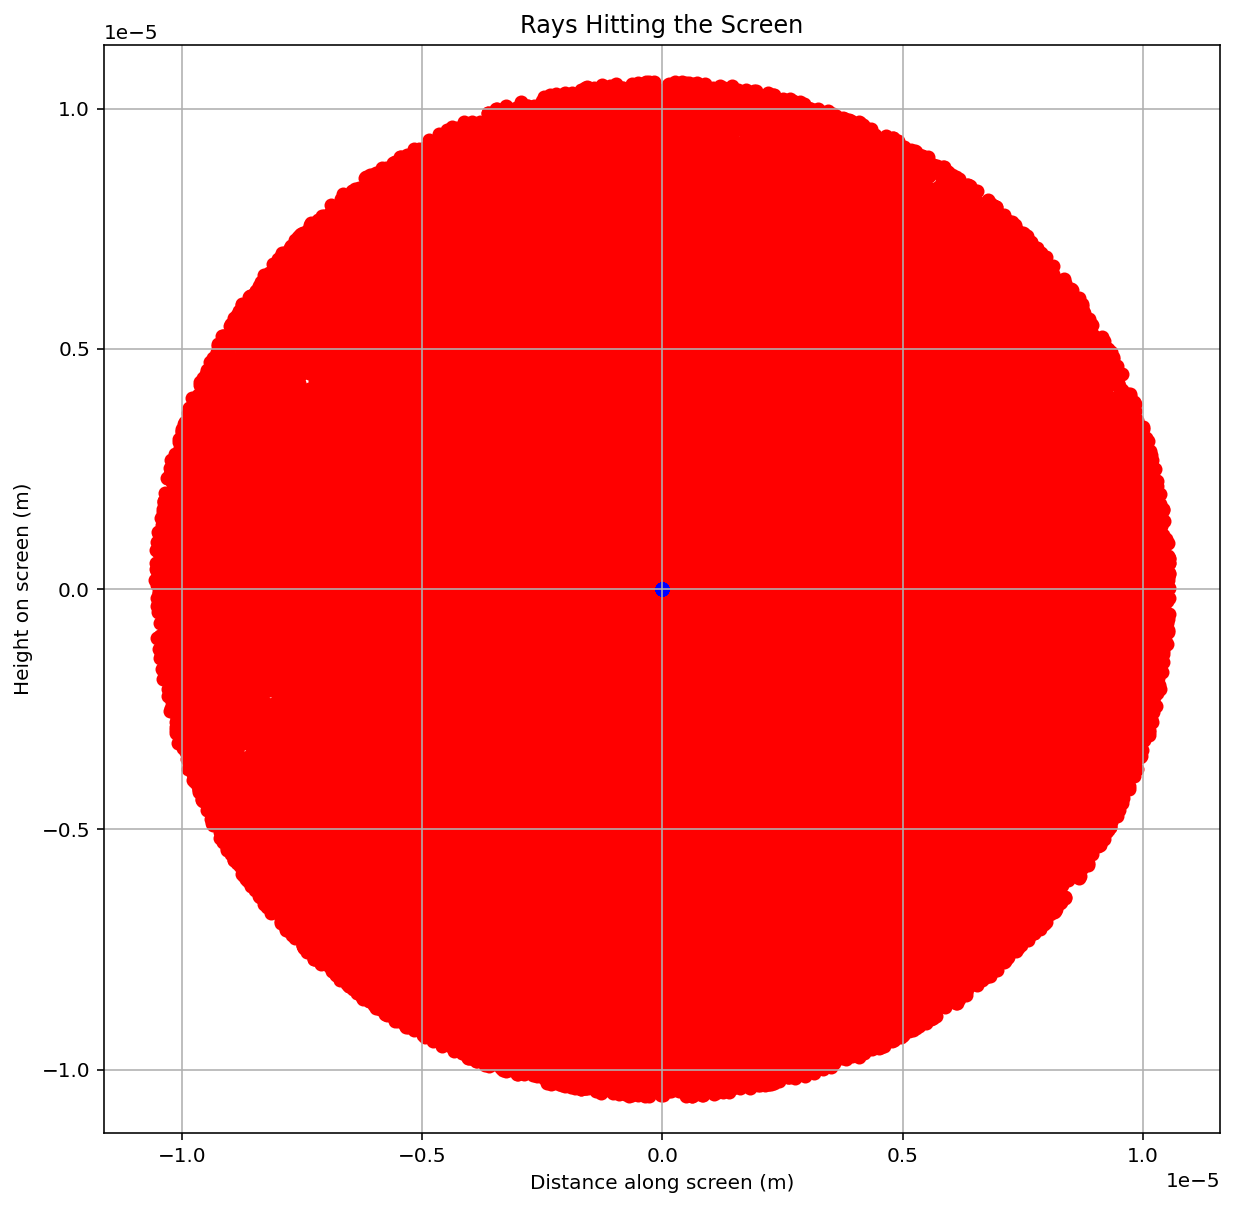

In [13]:
import matplotlib.pyplot as plt

# Define lens parameters
lensThickness = 0.01  # m
lensRadius = 0.250  # m
refractiveIndexAir = 1.0003  # Refractive index of air
focalLength = 0.26498832193701854 # Back focal lenght from previous question

# Generate random rays
np.random.seed(0)
numRays = 100000
yValues = np.random.uniform(-0.005, 0.005, numRays)
thetaValues = np.zeros(numRays)
rays = np.vstack((yValues, thetaValues))

class OpticalElement:
    def __init__(self, matrix):
        self.matrix = matrix
    
    def propagate(self, rays):
        '''
        Performing the matrix multiplication
        '''
        return self.matrix @ rays
    
    def __add__(self, other):
        if isinstance(other, OpticalElement):
            # Combining matrices of two optical elements by matrix multiplication
            combinedMatrix = other.matrix @ self.matrix
            return OpticalElement(combinedMatrix)
        else:
            raise TypeError("Unsupported operand type(s) for +: '{}' and '{}'".format(type(self), type(other)))

class Spherical(OpticalElement):
    def __init__(self, radius, n1, n2):
        '''
        SPHM: Spherical matrix
        radius: radius of curvature / the sphere that would plot geometry of lens
        n1: incident index
        n2: refracted index
        '''
        SPHM = np.array([[1, 0], [((n1 - n2) / (radius * n2)), (n1 / n2)]])
        super().__init__(SPHM)

class MiddleGlass(OpticalElement):
    def __init__(self, thickness, n):
        '''
        MGM: Middle Glass Matrix
        The travel of rays through middle glass (SiO2)
        thickness: thickness of the middle glass
        n: refractiveIndex: refractive index of SiO2
        '''
        MGM = np.array([[1, thickness/n], [0, 1]])
        super().__init__(MGM)

# Load refractive index data for SiO2
refractiveIndexData = pd.read_csv("SiO2.txt", sep="\t")
wavelengths = refractiveIndexData["Wavelength(nm)"]
refractiveIndices = refractiveIndexData["n"]
refractiveIndex400 = np.interp(400, wavelengths, refractiveIndices)
refractiveIndex410 = np.interp(410, wavelengths, refractiveIndices)

# Create optical systems and past both through this function
def createOpticalSystem(refractiveIndexIn, refractiveIndexOut):
    sphericalSurface = Spherical(radius=lensRadius, n1=refractiveIndexIn, n2=refractiveIndexOut)
    middleGlass = MiddleGlass(thickness=lensThickness, n=refractiveIndexOut)
    reverseSphericalSurface = Spherical(radius=-lensRadius, n1=refractiveIndexOut, n2=refractiveIndexIn)
    return sphericalSurface + middleGlass + reverseSphericalSurface

system1 = createOpticalSystem(refractiveIndexAir, refractiveIndex400)
system2 = createOpticalSystem(refractiveIndexAir, refractiveIndex410)

# Propagate rays through the optical systems
outputRaysSystem1 = system1.propagate(rays)
outputRaysSystem2 = system2.propagate(rays)

# Calculate final y-coordinate
def calculateFinalY(newYValues, newThetaValues, focalLength):
    return newYValues +  newThetaValues * focalLength

yFinal1 = calculateFinalY(outputRaysSystem1[0, :], outputRaysSystem1[1, :], focalLength)
yFinal2 = calculateFinalY(outputRaysSystem2[0, :], outputRaysSystem2[1, :], focalLength)

# Calculate x and z values
phiValues = np.random.uniform(0, 2*np.pi, numRays)
x1, z1 = yFinal1 * np.cos(phiValues), yFinal1 * np.sin(phiValues)
x2, z2 = yFinal2 * np.cos(phiValues), yFinal2 * np.sin(phiValues)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(x1, z1, c='blue', label='400 nm')
plt.xlabel('Distance along screen (m)')
plt.ylabel('Height on screen (m)')
plt.title('Rays Hitting the Screen (400 nm)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x2, z2, c='red', label='410 nm')
plt.xlabel('Distance along screen (m)')
plt.ylabel('Height on screen (m)')
plt.title('Rays Hitting the Screen (410 nm)')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
plt.scatter(x2, z2, c='red', label='410 nm')
plt.scatter(x1, z1, c='blue', label='400 nm')
plt.xlabel('Distance along screen (m)')
plt.ylabel('Height on screen (m)')
plt.title('Rays Hitting the Screen')
plt.axis("equal")
plt.grid(True)
plt.show()

What I found was that the back focal length is the focal length we have to use inorder to get a precise point for the blue wavelength, which it does here with a scale of 10^\-19. There is an odd circular structure which looks like a diffraction pattern i am ultimately unsure what is causing that to come into effect. immediately thought low statistics but i've tried higher number of rays and the pattern only gets more defined.
